a) Darstellung des Beispiel Signals.

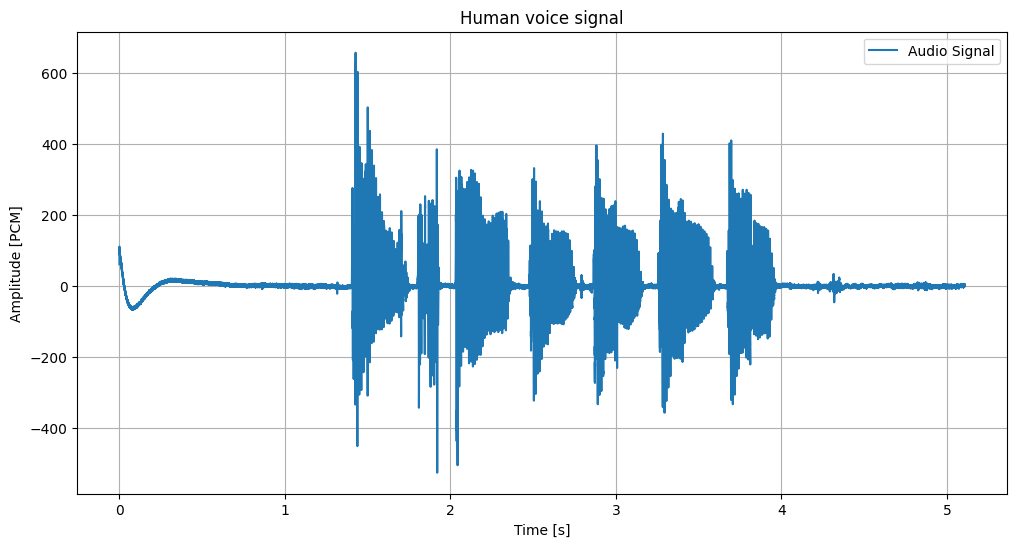

In [2]:
# get current working directory
import os
import matplotlib.pyplot as plt
import numpy as np

path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

data_a = np.load(path + '/Versuch4_Messungen/aufnahme 2_a.npy')

RATE = 44100  # Hz
time = np.linspace(0, len(data_a) / RATE, num=len(data_a))
# use matplotlib to plot data_a
# x-axis: time
# y-axis: amplitude
plt.figure(figsize=(12, 6))
plt.plot(time, data_a, label="Audio Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [PCM]')
plt.title("Human voice signal")
plt.grid()
plt.legend()
plt.show()


b) Überprüfung der Triggerfunktion

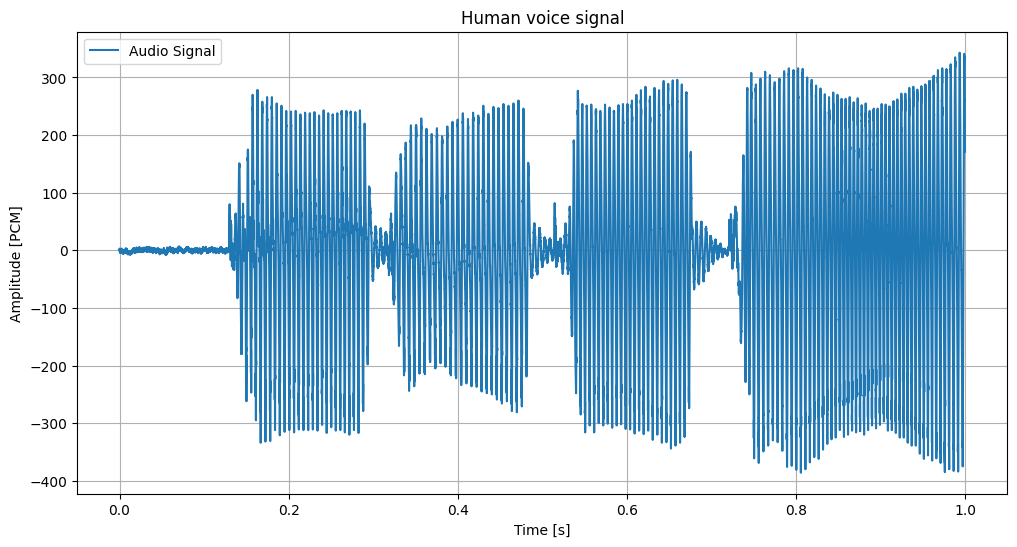

In [3]:
data_b = np.load(path + '/Versuch4_Messungen/audio_b.npy')

RATE = 44100  # Hz
time = np.linspace(0, len(data_b) / RATE, num=len(data_b))
# use matplotlib to plot data_a
# x-axis: time
# y-axis: amplitude
plt.figure(figsize=(12, 6))
plt.plot(time, data_b, label="Audio Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [PCM]')
plt.title("Human voice signal")
plt.grid()
plt.legend()
plt.show()

c) Bestimmung des Amplitudenspektrums

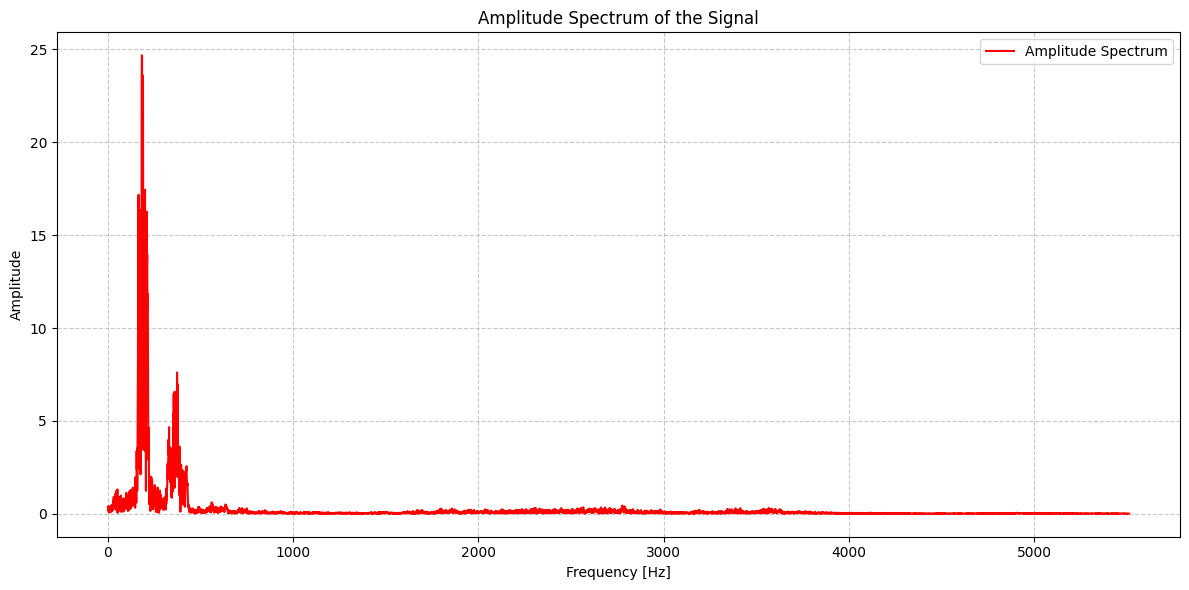

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the audio data
data_c = np.load(path + '/Versuch4_Messungen/audio_b.npy')

sampling_rate = 44100  # Sampling rate in Hz
M = len(data_c)  # Number of samples in the signal
delta_t = 1 / sampling_rate  # Sampling period (inverse of the sampling rate)

# Calculate the Fourier transform
fft_result = np.fft.fft(data_c)
amplitude_spectrum = np.abs(fft_result) / M  # Normalize by the number of samples

# Calculate the frequency axis in Hz
frequencies = np.fft.fftfreq(M, delta_t)

# Keep positive frequencies only
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]

# Focus on lower frequencies (first 1/16th of the range)
lower_freqs = positive_freqs[:M // 8]  # Adjust for the reduced range
lower_freq_amplitudes = positive_amplitudes[:M // 8]

# Plot the amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(lower_freqs, lower_freq_amplitudes, label="Amplitude Spectrum", color='red')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Amplitude Spectrum of the Signal")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


d) Windowing: Zerlegung des Signals in 512 Samples, die sich jeweils um 256 Samples überlappen.
Gewichtung der Samples in jedem Fenster mit einer Gaußschen Fensterfunktion.
Die Fensterfunktion soll so gewählt werden, dass die Fensterbreite 4 Standardabweichungen entspricht
In jedem Fenster wird eine lokale Fouriertransformation durchgeführt und die Fouriertransformierte wird durch mitteln aller Fenster ermittelt.
Daraus soll das Amplitudenspektrum berechnet werden.

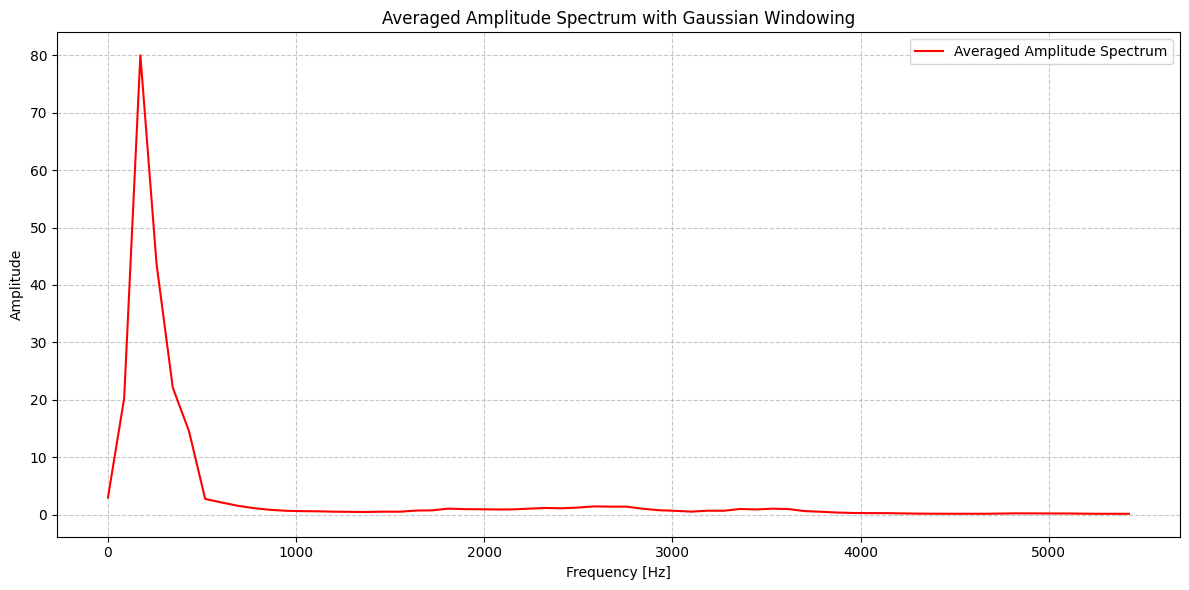

In [5]:
def avg_amp_spec(file_path):
    # Load the audio data
    data_d = np.load(path + f'/Versuch4_Messungen/{file_path}')
    
    # Parameters for the windowing
    sampling_rate = 44100  # Sampling rate in Hz
    window_size = 512  # Number of samples in each window
    overlap = 256  # Number of samples overlapping between windows
    step_size = window_size - overlap  # Number of samples to shift the window by
    num_samples = len(data_d)  # Number of samples in the signal
    delta_t = 1 / sampling_rate  # Sampling period
    gaussian_function_factor = 1 # Factor to adjust the height of the Gaussian window
    
    # Calculate the Gaussian window function
    std_dev = window_size / 4  # Standard deviation of the Gaussian window
    gaussian_window = gaussian_function_factor * np.exp(-0.5 * (np.arange(window_size) - window_size / 2) ** 2 / std_dev**2)
    
    # Normalize the window
    gaussian_window /= np.sum(gaussian_window)
    
    # Break the signal into overlapping windows
    num_windows = (num_samples - window_size) // step_size + 1
    amplitude_spectra = []
    
    for i in range(num_windows):
        # Define the window start and end indices
        start_idx = i * step_size
        end_idx = start_idx + window_size
    
        # Extract the window and apply the Gaussian function
        windowed_signal = data_d[start_idx:end_idx] * gaussian_window
    
        # Perform Fourier Transform on the windowed signal
        fft_result = np.fft.fft(windowed_signal)
        amplitude_spectrum = np.abs(fft_result)[:window_size // 2]  # Keep positive frequencies
        amplitude_spectra.append(amplitude_spectrum)
    
    # Average the amplitude spectra across all windows
    avg_amplitude_spectrum = np.mean(amplitude_spectra, axis=0)
    
    # Frequency axis
    frequencies = np.fft.fftfreq(window_size, delta_t)[:window_size // 2]
    # Focus on lower frequencies (first 1/16th of the range)
    lower_freqs = frequencies[:window_size // 8]
    lower_freq_amplitudes = avg_amplitude_spectrum[:window_size // 8]
    
    return lower_freq_amplitudes, lower_freqs

lower_freq_amplitudes, lower_freqs = avg_amp_spec("audio_b.npy") 
# Plot the averaged amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(lower_freqs, lower_freq_amplitudes, label="Averaged Amplitude Spectrum", color='red')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Averaged Amplitude Spectrum with Gaussian Windowing")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

 Die 4 Referenzspektren durch Mittelung über die jeweiligen 5 Test Spektren berechnen und darstellen.

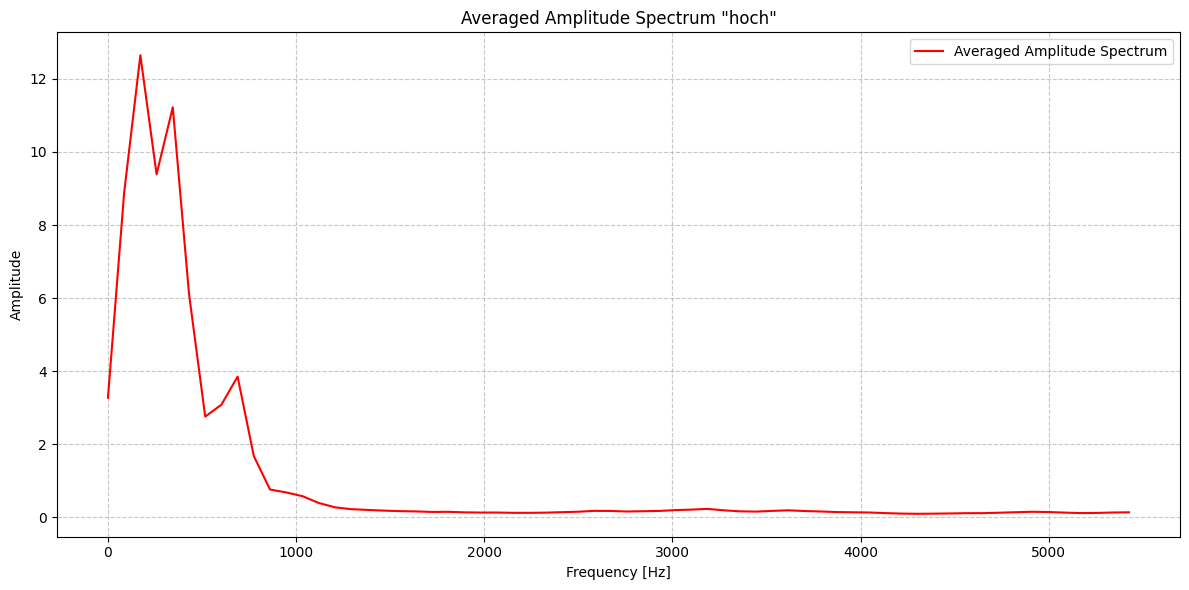

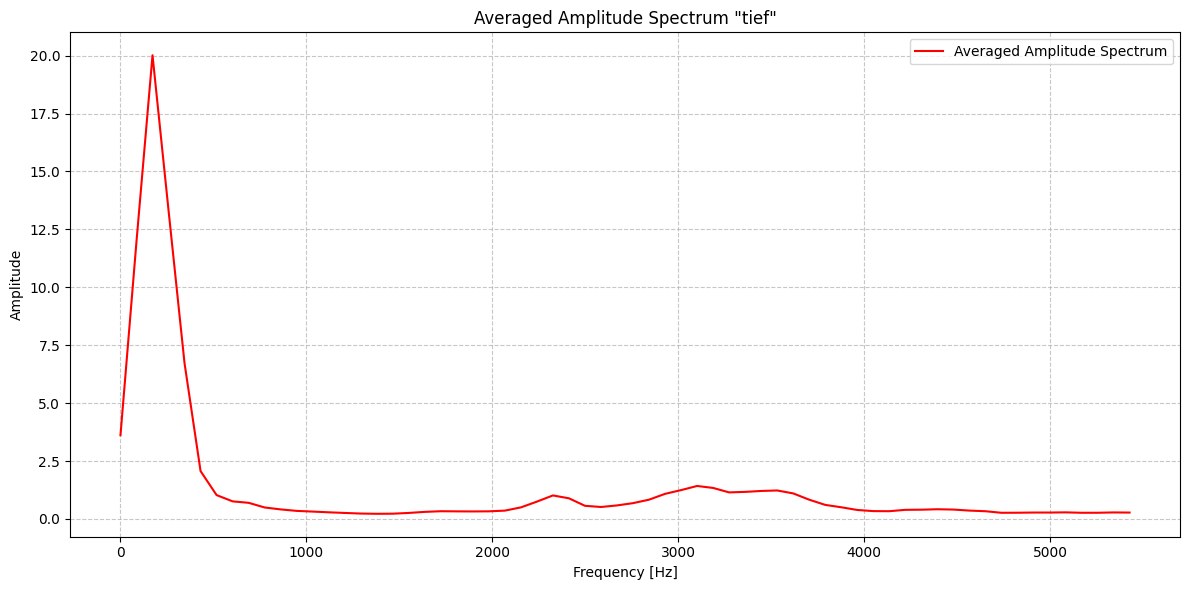

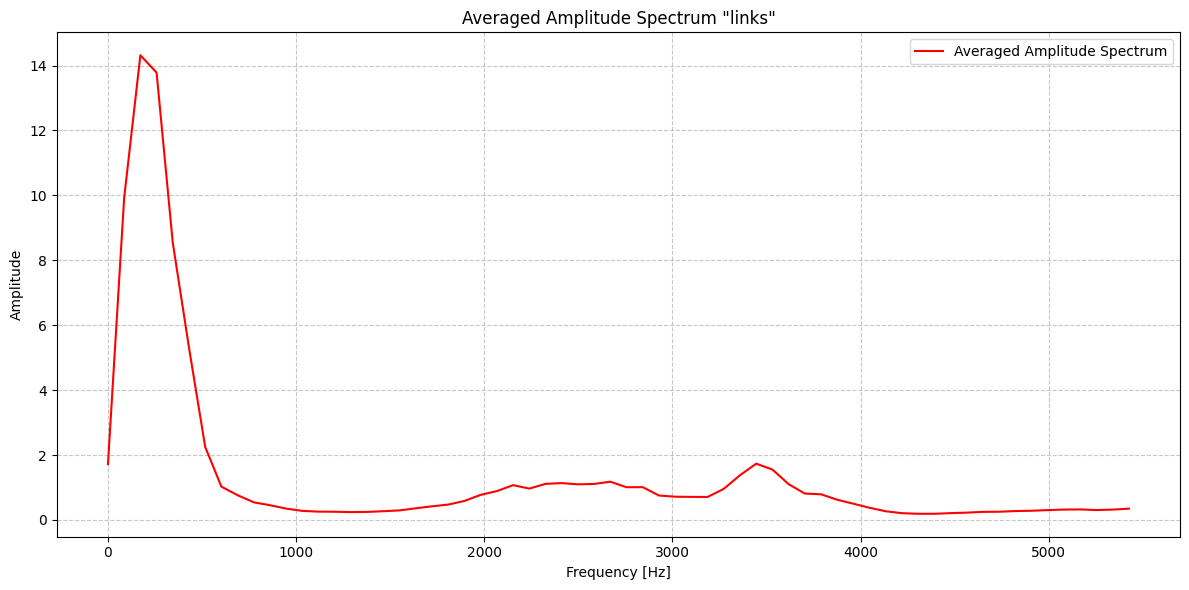

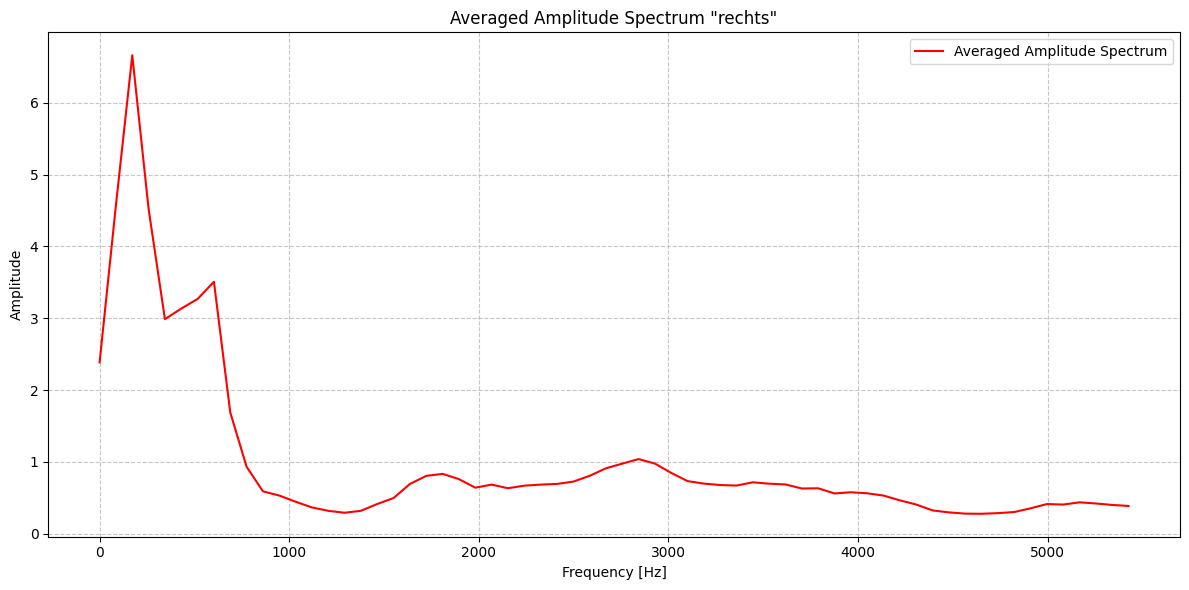

In [6]:
nothing, frequencies = avg_amp_spec(f"Trainingsdatensatz/hoch1.npy")

def avg_amplitude(file_name_no_int_no_suffix):
    amplitudes_array = []
    for i in range(1, 6):
        amplitudes, dont_use = avg_amp_spec(f"Trainingsdatensatz/{file_name_no_int_no_suffix}{i}.npy")
        amplitudes_array.append(amplitudes)

    avg_amplitudes = np.mean(amplitudes_array, axis=0)
    return avg_amplitudes


def plot_avg_amplitude_spectrum(avg_amplitudes, title):
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, avg_amplitudes, label="Averaged Amplitude Spectrum", color='red')
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

avg_amplitudes_hoch = avg_amplitude("hoch")
plot_avg_amplitude_spectrum(avg_amplitudes_hoch, "Averaged Amplitude Spectrum \"hoch\"")

avg_amplitudes_tief = avg_amplitude("tief")
plot_avg_amplitude_spectrum(avg_amplitudes_tief, "Averaged Amplitude Spectrum \"tief\"")

avg_amplitudes_links = avg_amplitude("links")
plot_avg_amplitude_spectrum(avg_amplitudes_links, "Averaged Amplitude Spectrum \"links\"")

avg_amplitudes_rechts = avg_amplitude("rechts")
plot_avg_amplitude_spectrum(avg_amplitudes_rechts, "Averaged Amplitude Spectrum \"rechts\"")


 c) Python-Routine zur Berechnung des Korrelationskoeffizienten nach
 Bravais-Pearson zum Vergleich zweier Eingabespektren. Test der Routine an Referenzspektren: 
 beim Vergleich identischer Spektren sollte die Korrelation 1 sein, bei verschiedenen
 Spektren nahe an 0.

In [17]:
def std(x):
    return np.sqrt(np.sum((x - np.mean(x)) ** 2)/(len(x)-1))
def covariance(x, y):
    return np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)
def corr(x, y):
    return covariance(x, y) / (std(x) * std(y))

print(f"Korrelationskoeffizient hoch hoch: {corr(avg_amplitudes_hoch, avg_amplitudes_hoch):.3f}")  # should be 1
print(f"Korrelationskoeffizient tief tief: {corr(avg_amplitudes_tief, avg_amplitudes_tief):.3f}")  # should be 1
print(f"Korrelationskoeffizient links links: {corr(avg_amplitudes_links, avg_amplitudes_links):.3f}")  # should be 1
print(f"Korrelationskoeffizient rechts rechts: {corr(avg_amplitudes_rechts, avg_amplitudes_rechts):.3f}")  # should be 1
print(f"Korrelationskoeffizient hoch tief: {corr(avg_amplitudes_hoch, avg_amplitudes_tief):.3f}")  # should be less than 1


Korrelationskoeffizient hoch hoch: 1.000
Korrelationskoeffizient tief tief: 1.000
Korrelationskoeffizient links links: 1.000
Korrelationskoeffizient rechts rechts: 1.000
Korrelationskoeffizient hoch tief: 0.889


Spracherkenner implementieren und testen an beiden Testdatensätzen. Angeben, wie viel Prozent der Testdaten
sätze korrekt bzw. falsch erkannt wurden (d.h. die Detektions- und die Fehlerrate).

In [33]:
def test_speaker_recognition(file_path):
    #test_data = np.load(path + f"/Versuch4_Messungen/{file_path}.npy")
    test_avg_amplitude, nothingness = avg_amp_spec(file_path)
    corr_hoch = corr(avg_amplitudes_hoch, test_avg_amplitude)
    corr_tief = corr(avg_amplitudes_tief, test_avg_amplitude)
    corr_links = corr(avg_amplitudes_links, test_avg_amplitude)
    corr_rechts = corr(avg_amplitudes_rechts, test_avg_amplitude)
        
    correlations = {
        "hoch": corr_hoch,
        "tief": corr_tief,
        "links": corr_links,
        "rechts": corr_rechts
    }
    max_corr_label = max(correlations, key=correlations.get)
    max_corr_value = correlations[max_corr_label]
    print(f"Max correlation is {max_corr_value:.3f} for {max_corr_label}\n")
    
# Testdatensatz Pascal
print("Testdatensatz Pascal")
for i in range(1, 6):
    print(f"hoch{i}")
    test_speaker_recognition(f"Testdatensatz Pascal/test_pascal_hoch{i}.npy")
    print(f"tief{i}")
    test_speaker_recognition(f"Testdatensatz Pascal/test_pascal_tief{i}.npy")
    print(f"links{i}")
    test_speaker_recognition(f"Testdatensatz Pascal/test_pascal_links{i}.npy")
    print(f"rechts{i}")
    test_speaker_recognition(f"Testdatensatz Pascal/test_pascal_rechts{i}.npy")

# 2 Fehler: links3 wird als tief erkannt, hoch4 als links
print(2/20 * 100, "% Fehlerrate")
print(18/20 * 100, "% Detektionsrate")

Testdatensatz Pascal
hoch1
Max correlation is 0.980 for hoch

tief1
Max correlation is 0.952 for tief

links1
Max correlation is 0.982 for links

rechts1
Max correlation is 0.975 for rechts

hoch2
Max correlation is 0.975 for hoch

tief2
Max correlation is 0.888 for tief

links2
Max correlation is 0.989 for links

rechts2
Max correlation is 0.947 for rechts

hoch3
Max correlation is 0.949 for hoch

tief3
Max correlation is 0.983 for tief

links3
Max correlation is 0.982 for tief

rechts3
Max correlation is 0.969 for rechts

hoch4
Max correlation is 0.941 for links

tief4
Max correlation is 0.943 for tief

links4
Max correlation is 0.924 for links

rechts4
Max correlation is 0.987 for rechts

hoch5
Max correlation is 0.881 for hoch

tief5
Max correlation is 0.935 for tief

links5
Max correlation is 0.987 for links

rechts5
Max correlation is 0.943 for rechts

10.0 % Fehlerrate
90.0 % Detektionsrate


In [32]:
print("Testdatensatz Alex")
# Testdatensatz Alex
for i in range(1, 6):
    print(f"hoch{i}")
    test_speaker_recognition(f"Testdatensatz Alex/test_alex_hoch{i}.npy")
    print(f"tief{i}")
    test_speaker_recognition(f"Testdatensatz Alex/test_alex_tief{i}.npy")
    print(f"links{i}")
    test_speaker_recognition(f"Testdatensatz Alex/test_alex_links{i}.npy")
    print(f"rechts{i}")
    test_speaker_recognition(f"Testdatensatz Alex/test_alex_rechts{i}.npy")

# 4 Fehler: tief2 wird als hoch erkannt, tief3 als hoch, tief4 als links, tief5 als links
print(4/20 * 100, "% Fehlerrate")
print(16/20 * 100, "% Detektionsrate")

Testdatensatz Alex
hoch1
Max correlation is 0.888 for hoch

tief1
Max correlation is 0.940 for tief

links1
Max correlation is 0.981 for links

rechts1
Max correlation is 0.883 for rechts

hoch2
Max correlation is 0.599 for hoch

tief2
Max correlation is 0.852 for hoch

links2
Max correlation is 0.960 for links

rechts2
Max correlation is 0.768 for rechts

hoch3
Max correlation is 0.875 for hoch

tief3
Max correlation is 0.480 for hoch

links3
Max correlation is 0.959 for links

rechts3
Max correlation is 0.923 for rechts

hoch4
Max correlation is 0.867 for hoch

tief4
Max correlation is 0.919 for links

links4
Max correlation is 0.925 for links

rechts4
Max correlation is 0.953 for rechts

hoch5
Max correlation is 0.853 for hoch

tief5
Max correlation is 0.887 for links

links5
Max correlation is 0.936 for links

rechts5
Max correlation is 0.738 for rechts

20.0 % Fehlerrate
80.0 % Detektionsrate


e) Diskussion der Ergebnisse
Testdatensatz Pascal: hohe Korrelation zwischen Testdaten und Referenzspektrum, hohe Detektionsrate
Testdatensatz Alex: tief 3 sehr niedrige Korrelation, wird nicht wirklich erkannt
niedrigere Korrelation, niedrigere Detektionsrate
4 von 5 tiefs werden nicht als tief erkannt

Windows könnten größer sein, um schärfere Peaks zu erhalten, aber dadurch könnte die Korrelation künstlich sinken
Wortbereiche könnten einzeln korreliert werden, um Wortverlauf zu berücksichtigen und nicht nur gesamtes Spektrum

Bei besonders schlechter Korrelation (z.B. <0.5) könnte der Spracherkenner um eine Wiederholung bitten, um die Detektionsrate zu erhöhen, statt einfach eine eventuell falsche Zuordnung zu machen